In [1]:
# %load_ext autoreload
# %autoreload 2


In [2]:
import sys
sys.path.append('..')


In [3]:
import autograd.numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
from utils.games import WetChicken2D


In [5]:
env = WetChicken2D(L=5, W=3, max_steps=20, seed=207)
env.run(episodes=1_000, progress=100)


Episode 100/1000 took 17 steps.
Episode 200/1000 took 20 steps.
Episode 300/1000 took 20 steps.
Episode 400/1000 took 11 steps.
Episode 500/1000 took 7 steps.
Episode 600/1000 took 17 steps.
Episode 700/1000 took 5 steps.
Episode 800/1000 took 3 steps.
Episode 900/1000 took 4 steps.
Episode 1000/1000 took 5 steps.


In [6]:
transition_dataset = env.extract_transition_dataset()
transition_dataset


,start_x,start_y,action_x,action_y,result_x,result_y
0,3,5,-1,1,2,4
1,2,4,1,1,3,3
2,3,3,0,2,3,2
3,3,2,1,1,3,2
4,3,2,0,2,3,0
...,...,...,...,...,...,...
14263,1,5,1,1,2,5
14264,2,5,1,1,3,5
14265,3,5,0,2,3,3
14266,3,3,0,2,3,2


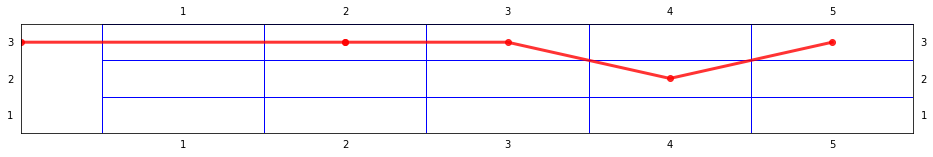

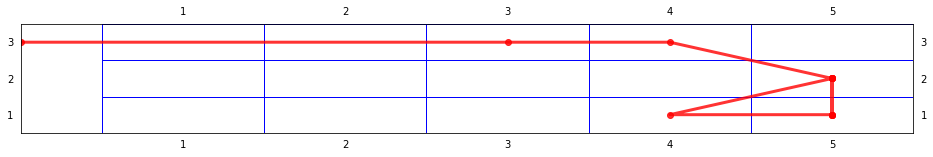

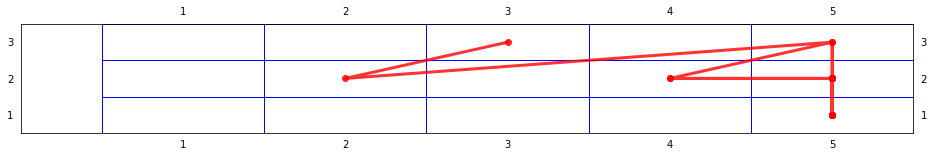

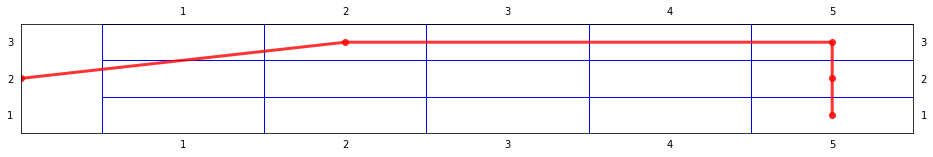

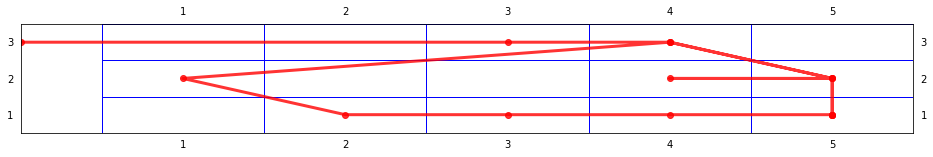

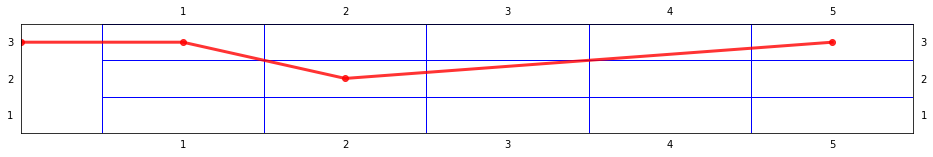

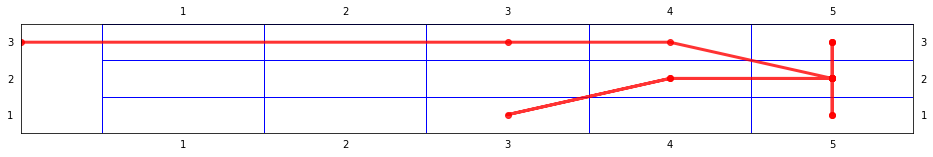

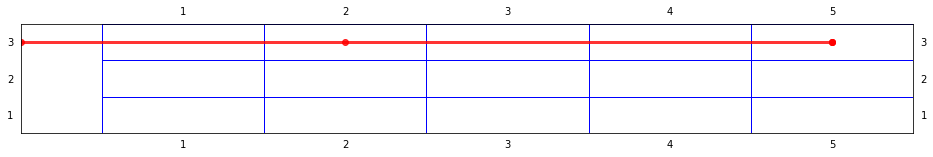

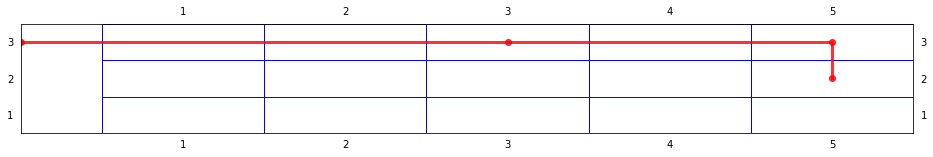

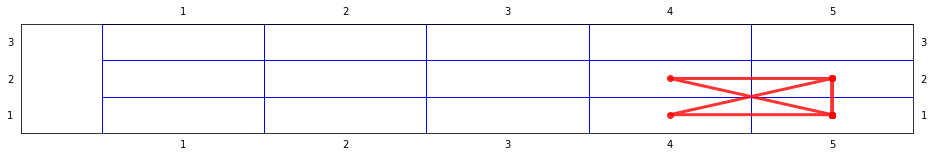

In [7]:
def plot_environment(env, ax=None):
    
    if ax:
        fig = ax.figure
    else:
        fig,ax = plt.subplots(1,1,figsize=(16,5))
    
    ax.set_xticks(range(1,env.L+1))
    ax.set_yticks(range(1,env.W+1))
    for x in range(0,env.L+1):
        ax.plot([x+0.5,x+0.5],[0.5,env.W+0.5], lw=1, color='blue')
    for y in range(0,env.W+1):
        ax.plot([0.5,env.L+0.5],[y+0.5,y+0.5], lw=1, color='blue')
    ax.set_xlim((0,env.L+0.5))
    ax.set_ylim((0.5,env.W+0.5))
    
    ax.tick_params(labeltop=True, labelright=True, width=0)
    
    return fig,ax

def plot_episode(env, ep, fade=False, ax=None):
    
    fig, ax = plot_environment(env=env, ax=ax)
    
    states = env.state_history[ep]
    
    if fade:
        n_steps = len(states)
        for t in range(n_steps-1):
            xs = states[t][0],states[t+1][0]
            ys = states[t][1],states[t+1][1]
            alpha = 0.5 + 0.5*(t)/(n_steps-2)
            ax.plot(ys, xs, color='red', alpha=alpha, lw=3, marker='o')
    else:
        xs, ys = [x for x,y in states], [y for x,y in states]
        ax.plot(ys, xs, color='red', alpha=0.8, lw=3, marker='o')
    
    return fig,ax

for ep in range(10):
    fig,ax = plt.subplots(1,1,figsize=(16,2))
    plot_episode(env, ep=ep, ax=ax)
